In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import gdown
import zipfile
import os
import folium

## Merging with Teryt - data about location for geopandas.

In [144]:
# Loading main data from GDrive.
file_id = "110IwUQC6J0RoDpJyC1SqBTzvGr-qQKua"
url = f"https://drive.google.com/uc?id={file_id}"
file_extension = "downloaded_file.csv"
gdown.download(url, file_extension, quiet=False)
df = pd.read_csv(file_extension, sep=",")

Downloading...
From (original): https://drive.google.com/uc?id=110IwUQC6J0RoDpJyC1SqBTzvGr-qQKua
From (redirected): https://drive.google.com/uc?id=110IwUQC6J0RoDpJyC1SqBTzvGr-qQKua&confirm=t&uuid=179c144e-326f-4c3e-aa0a-9d09b0a3a910
To: E:\Magisterka\Kod\2024-mgr-sluzba-cywilna\Python\Code\downloaded_file.csv
100%|██████████| 252M/252M [01:44<00:00, 2.42MB/s] 


In [145]:
# Loading teryt data.
file_id = "16YMXsOSYkQLncm0nqfqw5Z7mAW8TF-ql"
url = f"https://drive.google.com/uc?id={file_id}"
file_extension = "downloaded_file.csv"
gdown.download(url, file_extension, quiet=False)
teryt = pd.read_csv(file_extension, sep=",")

Downloading...
From: https://drive.google.com/uc?id=16YMXsOSYkQLncm0nqfqw5Z7mAW8TF-ql
To: E:\Magisterka\Kod\2024-mgr-sluzba-cywilna\Python\Code\downloaded_file.csv
100%|██████████| 1.32M/1.32M [00:00<00:00, 2.08MB/s]


In [146]:
# Merging data.
df_with_teryt = pd.merge(df, teryt, left_on=['ad_id'], right_on=['job_id'], how="left")

# Name changes.
df_with_teryt["voivodeship"] = df_with_teryt["WOJ"]
df_with_teryt["district"] = df_with_teryt["POW"]
df_with_teryt.drop(columns=[
    "WOJ", "POW", "job_id"
], inplace=True)

,ad_id,result,job_field,position_category,position,education_level,work_time,vacancies,city,institution,...,year_announced,promocja,kandydaci,salary_for_position,offer_salary,women_percentage,fluctuation,employment_contract,voivodeship,district
0,130994,1,vet,stanowiska samodzielne,inspektor weterynaryjny,3,0.5,1,Olesno,Powiatowy Inspektorat Weterynarii w Oleśnie,...,2023,1.0,1.0,NaN,nie podano wynagrodzenia,0.666667,0.064683,1.19,16,8
1,130970,0,tech/construction,stanowiska samodzielne,starszy specjalista,3,1.0,1,Bydgoszcz,Wojewódzki Inspektorat Nadzoru Budowlanego w B...,...,2023,0.0,4.0,NaN,nie podano wynagrodzenia,0.580645,0.036010,0.50,4,61
2,130898,1,vet,stanowiska samodzielne,asystent,2,1.0,1,Chrzanów,Powiatowy Inspektorat Weterynarii w Chrzanowie,...,2023,0.0,18.0,NaN,"4400,00 zł brutto",0.833333,0.101215,NaN,12,3
3,130919,0,uniformed services,stanowiska samodzielne,specjalista,4,1.0,1,Warszawa,Komenda Stołeczna Policji w Warszawie,...,2023,NaN,NaN,NaN,"4940,34 zł brutto",NaN,NaN,NaN,14,65
4,130837,1,vet,stanowiska samodzielne,inspektor weterynaryjny,3,1.0,1,Świdnica,Powiatowy Inspektorat Weterynarii w Świdnicy,...,2023,1.0,2.0,10268.888889,nie podano wynagrodzenia,0.833333,0.000000,3.00,2,19


## Geolocation data merge

In [136]:
# Now I'm downloading the whole folder from GDrive, which comes as ZIP.
file_id = "1kh8xFFlBgsYcD1D4_QX3C7Z19csvCfvo"
url = f"https://drive.google.com/uc?id={file_id}"
file_extension = "downloaded_file.zip"
gdown.download(url, file_extension, quiet=False)

with zipfile.ZipFile(file_extension, 'r') as zip_ref:
    zip_ref.extractall("wojewodztwa")

# The first is the downloaded ZIP, the second is the zipped folder, and finally, the file.
shapefile_path = os.path.join("wojewodztwa", "wojewodztwa", "wojewodztwa.shp")
wojewodztwa = gpd.read_file(shapefile_path)

Downloading...
From: https://drive.google.com/uc?id=1kh8xFFlBgsYcD1D4_QX3C7Z19csvCfvo
To: E:\Magisterka\Kod\2024-mgr-sluzba-cywilna\Python\Code\downloaded_file.zip
100%|██████████| 5.41M/5.41M [00:01<00:00, 2.81MB/s]


In [137]:
file_id = "1JuxIhxlp78fkZbqEijPQkRLCcEW9OsHw"
url = f"https://drive.google.com/uc?id={file_id}"
file_extension = "downloaded_file.zip"
gdown.download(url, file_extension, quiet=False)

with zipfile.ZipFile(file_extension, 'r') as zip_ref:
    zip_ref.extractall("powiaty")

shapefile_path = os.path.join("powiaty", "powiaty", "powiaty.shp")
powiaty = gpd.read_file(shapefile_path)

powiaty.head()

Downloading...
From (original): https://drive.google.com/uc?id=1JuxIhxlp78fkZbqEijPQkRLCcEW9OsHw
From (redirected): https://drive.google.com/uc?id=1JuxIhxlp78fkZbqEijPQkRLCcEW9OsHw&confirm=t&uuid=131bdd9a-1d42-4034-8928-6688f7e228db
To: E:\Magisterka\Kod\2024-mgr-sluzba-cywilna\Python\Code\downloaded_file.zip
100%|██████████| 28.2M/28.2M [00:10<00:00, 2.76MB/s]


,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,JPT_ID,JPT_POWI_1,JPT_KJ_I_3,JPT_GEOMET,JPT_GEOM_1,SHAPE_LENG,SHAPE_AREA,REGON,RODZAJ,geometry
0,None,POW,92617,1807,powiat krośnieński,None,13415,20210128,0,20170101,...,1359583,0,None,0,0,3.11205337354,.12332626559,37044051900000,powiat,"POLYGON ((689863.285 218885.536, 689862.128 21..."
1,None,POW,141297,2804,powiat elbląski,None,13422,20210514,0,20120926,...,1360107,0,None,0,0,4.2521309989,.19417975633,17074769000000,powiat,"POLYGON ((551842.165 693417.652, 551870.912 69..."
2,None,POW,209827,1415,powiat ostrołęcki,None,13409,20210518,0,20120926,...,1360143,0,None,0,0,5.31641009622,.28125317026,55066883500000,powiat,"POLYGON ((646230.458 617154.258, 646336.602 61..."
3,None,POW,79097,0413,powiat sępoleński,None,13424,20220112,0,20120926,...,1362180,0,None,0,0,2.00313300009,.10690160786,09235092600000,powiat,"POLYGON ((384997.245 615178.269, 385170.687 61..."
4,None,POW,126576,3019,powiat pilski,None,13417,20220112,0,20120926,...,1362184,0,None,0,0,4.17134504707,.17008216429,57079948000000,powiat,"POLYGON ((342585.530 579834.380, 342632.859 57..."


##### Merging the geopandas object with the main dataframe.

In [138]:
wojewodztwa['JPT_KOD_JE'] = wojewodztwa['JPT_KOD_JE'].astype(int)
merged_wojewodztwa = wojewodztwa.merge(df_with_teryt, left_on=['JPT_KOD_JE'], right_on=['voivodeship'], how="inner")

# The categorical code for a district contains the code of its voivodeship at the beginning.
powiaty["JPT_KOD_JE"] = powiaty["JPT_KOD_JE"].str.slice(2,)
powiaty['JPT_KOD_JE'] = powiaty['JPT_KOD_JE'].astype(int)

merged_powiaty = powiaty.merge(df_with_teryt, left_on=['JPT_KOD_JE'], right_on=['district'], how="inner")

,gml_id,JPT_SJR_KO,JPT_POWIER,JPT_KOD_JE,JPT_NAZWA_,JPT_ORGAN_,JPT_JOR_ID,WERSJA_OD,WERSJA_DO,WAZNY_OD,...,year_announced,promocja,kandydaci,salary_for_position,offer_salary,women_percentage,fluctuation,employment_contract,voivodeship,district
0,None,POW,92617,7,powiat krośnieński,None,13415,20210128,0,20170101,...,2023,1.0,0.000,NaN,nie podano wynagrodzenia,1.000000,0.000000,NaN,32,7
1,None,POW,92617,7,powiat krośnieński,None,13415,20210128,0,20170101,...,2023,1.0,10.875,7483.541667,"nie mniej niż 3600,00 zł brutto",0.591837,0.019916,4.0,6,7
2,None,POW,92617,7,powiat krośnieński,None,13415,20210128,0,20170101,...,2023,0.0,0.300,11016.666667,nie podano wynagrodzenia,0.777778,0.111111,5.0,32,7
3,None,POW,92617,7,powiat krośnieński,None,13415,20210128,0,20170101,...,2023,0.0,0.200,NaN,nie podano wynagrodzenia,0.625000,0.000000,NaN,8,7
4,None,POW,92617,7,powiat krośnieński,None,13415,20210128,0,20170101,...,2023,1.0,33.000,NaN,"około 3600,00 zł brutto",0.800000,0.000000,NaN,6,7


## Maps

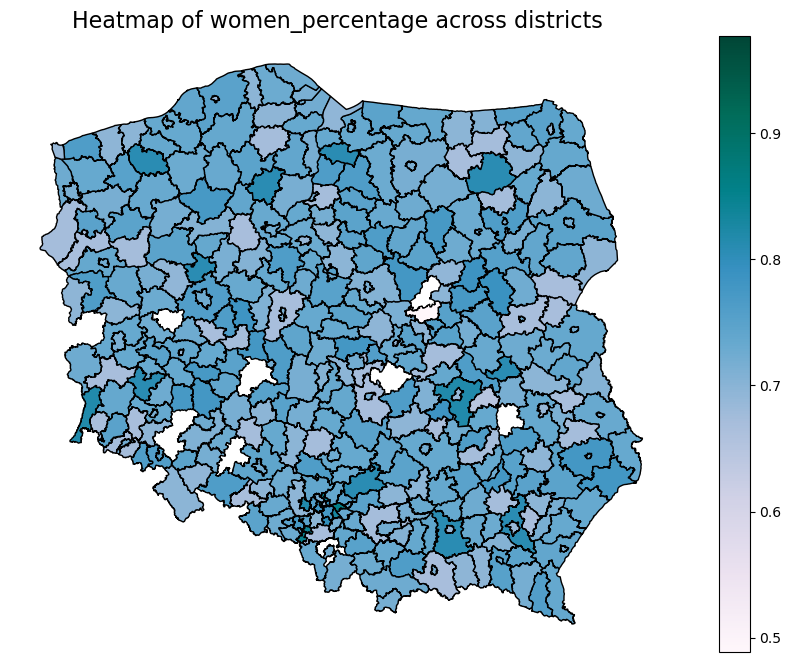

In [130]:
# Copy of the above code for comparison between maps.

# Group by
group_by = "mean"
year_of_choice = ""

# Visualisation of choice for districts.
column_of_choice = input("Type a metric column\n")

# Choose whether the map should tell about all the data or only from a year of choice.
if_subset = input("Subset the data to a particular year?\nType 'yes' or 'no'\n")
if if_subset == "yes":
    year_of_choice = int(input("choose year\n"))
    powiaty_map = merged_powiaty[["JPT_NAZWA_", "geometry", column_of_choice, "year_announced"]]
    powiaty_map = powiaty_map[powiaty_map["year_announced"] == year_of_choice]
else:
    powiaty_map = merged_powiaty[["JPT_NAZWA_", "geometry", column_of_choice]]

# Aggregation.
aggregated_powiaty_map = (
    powiaty_map.groupby("JPT_NAZWA_")
    .agg({
        column_of_choice: group_by,
        "geometry": "first"
    })
    .reset_index()
)

# Making the df a geo df once again.
aggregated_powiaty_map = gpd.GeoDataFrame(aggregated_powiaty_map, geometry=aggregated_powiaty_map["geometry"])

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

aggregated_powiaty_map.plot(
    column=column_of_choice,
    cmap="PuBuGn",
    legend=True,
    edgecolor="black",
    ax=ax
)

ax.set_title(f"Heatmap of {column_of_choice} across districts {year_of_choice}", fontsize=16)
ax.axis("off")

plt.show()